# Sensitivity to Choice of Algorithm

Mathematically equivalent equations are **not** all equally good for numerical work.  In fact, the mathematical expressions we use for defining many quantities (derivatives, integrals, *etc.*) are often very poor for numerical work.  Here we will explore this using a simple example.

Load all the modules we need.  This should typically be done early in the document.

In [1]:
import numpy as np

## Calculation of $1/3^n$

There are many, many ways to calculate $1/3^n$.  Here we will explore two recursion relations.  Mathematically these *exactly* calculate $1/3^n$.  We are interested in how they behave numerically.

#### $p$ Recursion Formula

Consider the following recursive algorithm:
$$ p_0 = 1, \quad p_1 = \frac{1}{3},$$
$$p_n = \frac{5}{6} p_{n-1} - \frac{1}{6} p_{n-2}, \quad \mbox{ for all }\, n\ge2.$$

This is implemented below.

In [2]:
def prec(n):
    """Mostly stable recursion relation for 1/3^n.
    Input: n : integer value.
    Output: Array of all values of 1/3^n from 0 up to and including n."""
    p = np.zeros(n+1)
    p[0] = 1
    p[1] = 1. / 3
    for j in range(2, n+1):
        p[j] = 5. / 6 * p[j-1] - 1. / 6 * p[j-2]
    return p    

#### $q$ Recursion Formula

Consider the following recursive algorithm:
$$ q_0 = 1, \quad q_1 = \frac{1}{3},$$
$$q_n = \frac{5}{3} q_{n-1} - \frac{4}{9} q_{n-2}, \quad \mbox{ for all }\, n\ge2.$$

This is implemented below.

In [3]:
def qrec(n):
    """Mostly unstable recursion relation for 1/3^n.
    Input: n : integer value.
    Output: Array of all values of 1/3^n from 0 up to and including n."""
    q = np.zeros(n+1)
    q[0] = 1
    q[1] = 1. / 3
    for j in range(2, n+1):
        q[j] = 5. / 3 * q[j-1] - 4. / 9 * q[j-2]
    return q    

## Basic Tests

Let us see what we have created and verify it works.

#### Documentation

We can get documentation on the functions we wrote.  This shows us how/where the documentation is stored.  We can use the existing system even for the functions we write!

In [4]:
prec?

Signature: prec(n)
Docstring:
Mostly stable recursion relation for 1/3^n.
Input: n : integer value.
Output: Array of all values of 1/3^n from 0 up to and including n.
File:      /tmp/ipykernel_659376/2476553707.py
Type:      function


#### Small tests

We should actually run the functions for a small `n` to verify they do something and produce the same results (they are *suppose* to be calculating the same thing).

In [5]:
prec(4)

array([1.        , 0.33333333, 0.11111111, 0.03703704, 0.01234568])

In [6]:
qrec(4)

array([1.        , 0.33333333, 0.11111111, 0.03703704, 0.01234568])

## Tests

We know what values should be returned, so we can compare them to the expected values.  Here we do so by calculating the fractional error in both algorithms.

In [7]:
N = 40
p = prec(N)
q = qrec(N)
n = np.arange(N+1)
expected = 1 / 3.**n
perr = np.abs(1 - p / expected)
qerr = np.abs(1 - q / expected)

#### Aside: Division and forcing floating point numbers

In Python 3 division of integers that should produce a floating point number will in fact produce a floating point number.  This may seem obvious to you, but it is **not the case in most other (older) languages** and even is not true in Python 2.  In other languages 1/4 = 0, not 0.25, since it is doing integer division and returned the closest integer by truncating the decimal places.  This behavior (unfortunately) was changed in Python 3.

This can lead to problems and inconsistencies.  Take for example the `expected` variable above.  There I forced floating point division, and in fact I forced `3.**n` to be floating point instead of an integer.  Why did I do this?  Let's check.  Suppose we did not force floating point, then we find the following.

In [8]:
1 / 3**n 

array([ 1.00000000e+00,  3.33333333e-01,  1.11111111e-01,  3.70370370e-02,
        1.23456790e-02,  4.11522634e-03,  1.37174211e-03,  4.57247371e-04,
        1.52415790e-04,  5.08052634e-05,  1.69350878e-05,  5.64502927e-06,
        1.88167642e-06,  6.27225474e-07,  2.09075158e-07,  6.96917194e-08,
        2.32305731e-08,  7.74352438e-09,  2.58117479e-09,  8.60391597e-10,
        2.86797199e-10,  9.55990664e-11,  3.18663555e-11,  1.06221185e-11,
        3.54070616e-12,  1.18023539e-12,  3.93411796e-13,  1.31137265e-13,
        4.37124217e-14,  1.45708072e-14,  4.85693575e-15,  1.61897858e-15,
        5.39659528e-16,  1.79886509e-16,  5.99621697e-17,  1.99873899e-17,
        6.66246331e-18,  2.22082110e-18,  7.40273701e-19,  2.46757900e-19,
       -1.59005804e-19])

How can this be negative for large `n`?!  If we compare this to `expected` we see

In [9]:
expected

array([1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
       1.23456790e-02, 4.11522634e-03, 1.37174211e-03, 4.57247371e-04,
       1.52415790e-04, 5.08052634e-05, 1.69350878e-05, 5.64502927e-06,
       1.88167642e-06, 6.27225474e-07, 2.09075158e-07, 6.96917194e-08,
       2.32305731e-08, 7.74352438e-09, 2.58117479e-09, 8.60391597e-10,
       2.86797199e-10, 9.55990664e-11, 3.18663555e-11, 1.06221185e-11,
       3.54070616e-12, 1.18023539e-12, 3.93411796e-13, 1.31137265e-13,
       4.37124217e-14, 1.45708072e-14, 4.85693575e-15, 1.61897858e-15,
       5.39659528e-16, 1.79886509e-16, 5.99621697e-17, 1.99873899e-17,
       6.66246331e-18, 2.22082110e-18, 7.40273701e-19, 2.46757900e-19,
       8.22526334e-20])

Notice this is perfectly well behaved, even for the largest value of `n`.  What went wrong?  The problem is again the finite number of digits that can be stored.  In this case, it is the fact that an integer also only can have a finite number of digits in it, if we try to calculate "too large" an integer it overflows, becoming negative.  In other words, we "accidentally" set the sign bit.  To check this consider the following.

In [10]:
3**n[-1]

-6289078614652622815

As we see, this is a negative number, hence the problem.  If we force floating point on the other hand:

In [11]:
3.**n[-1]

1.2157665459056929e+19

We see it is now positive.  It is **not exact**.  We cannot store 19 digits so this value has been truncated.

To further complicate things consider the following.

In [12]:
3**N

12157665459056928801

This did **not overflow**.  It is positive and exact!  What is going on?!  Well, there is no maximum for integers in Python 3, we can have arbitrarily large values.  So why did this not work above?  The reason is that we are using NumPy which passes off all calculations to compiled code with fixed sizes and precision.  Since `n` is a NumPy array we secretly forced Python to use NumPy routines for the calculation instead of its own.

Why would we want to do this?  The NumPy routines are significantly faster and more powerful.  We can operate on arrays of values and by having fixed precision the algorithms can be much more efficient.  But this does show one of the many confusing things that can happen.

#### Advice

My advice is to always be explicit.  When you mean to use floating point numbers, force floating point numbers.  We will see this show up other times when working with NumPy arrays and algorithms.  Although most of the time things will work fine if we are not careful, when it does not work it can be very difficult to debug.  We can avoid that pain by being careful from the beginning.

Getting back to our tests we see the errors are ...

In [13]:
perr

array([0.00000000e+00, 0.00000000e+00, 2.22044605e-16, 6.66133815e-16,
       1.77635684e-15, 3.10862447e-15, 5.77315973e-15, 9.54791801e-15,
       1.55431223e-14, 2.48689958e-14, 3.88578059e-14, 5.99520433e-14,
       9.17044218e-14, 1.39666056e-13, 2.12274642e-13, 3.21076499e-13,
       4.84501328e-13, 7.29194483e-13, 1.09645626e-12, 1.64734892e-12,
       2.47379894e-12, 3.71347397e-12, 5.57331958e-12, 8.36308800e-12,
       1.25486288e-11, 1.88269400e-11, 2.82445178e-11, 4.23712176e-11,
       6.35613784e-11, 9.53470636e-11, 1.43026035e-10, 2.14544826e-10,
       3.21823235e-10, 4.82740514e-10, 7.24117211e-10, 1.08618248e-09,
       1.62928049e-09, 2.44392706e-09, 3.66589759e-09, 5.49885359e-09,
       8.24828805e-09])

In [14]:
qerr

array([0.00000000e+00, 0.00000000e+00, 4.44089210e-16, 3.10862447e-15,
       1.35447209e-14, 5.59552404e-14, 2.27817765e-13, 9.14379683e-13,
       3.66173758e-12, 1.46525014e-11, 5.86160009e-11, 2.34470221e-10,
       9.37887989e-10, 3.75155973e-09, 1.50062471e-08, 6.00249976e-08,
       2.40100000e-07, 9.60400009e-07, 3.84160005e-06, 1.53664002e-05,
       6.14656008e-05, 2.45862403e-04, 9.83449612e-04, 3.93379845e-03,
       1.57351938e-02, 6.29407752e-02, 2.51763101e-01, 1.00705240e+00,
       4.02820961e+00, 1.61128385e+01, 6.44513538e+01, 2.57805415e+02,
       1.03122166e+03, 4.12488664e+03, 1.64995466e+04, 6.59981863e+04,
       2.63992745e+05, 1.05597098e+06, 4.22388392e+06, 1.68955357e+07,
       6.75821428e+07])

Notice that the errors are not zero, so the values are not exact, but we do not expect them to be.  We expect them to be "close", for some definition of close.  In both cases the errors are rather small at first, but the errors for the $q$ recursion seem to be growing faster than for the $p$ recursion.  In fact, for the $q$ recursion the error becomes huge!  The recursion totally fails!  This despite the fact that both algorithms are mathematically exact.

## Plots of Errors

Looking at lists of numbers is fine, but a plot is typically easier to read.  Plotting will be covered in more detail in the first few labs.  Eventually the following will be quite natural for you ....

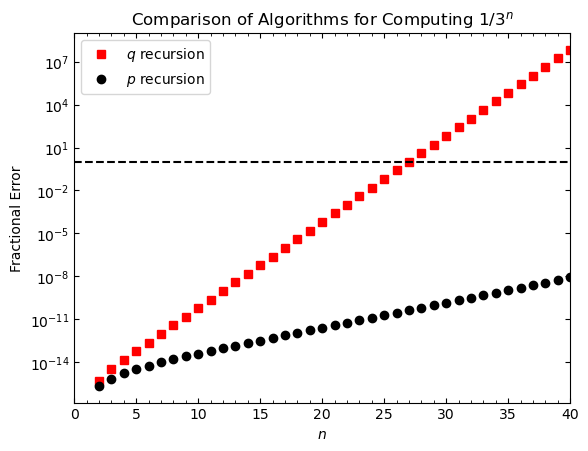

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogy(n, qerr, 'rs', label=r'$q$ recursion')
ax.semilogy(n, perr, 'ko', label=r'$p$ recursion')
ax.axhline(1, ls='--', color='k')
ax.set_xlabel(r'$n$')
ax.set_ylabel('Fractional Error')
ax.set_title(r'Comparison of Algorithms for Computing $1/3^n$')
ax.minorticks_on()
ax.legend(loc='upper left')
# Purely aesthetic changes.
# I will "rant" about this in a future lab!
ax.set_xlim(0, 40)
ax.tick_params(which='both', direction='in', right=True, top=True)

From the plot we can clearly see that the errors in the $q$ recursion algorithm not only grow much more quickly than those from the $p$ recursion algorithm, but become absurdly large.  This algorithm is not usable for actual computations! 